### Load essential Library

In [1]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score
import seaborn as sns

### Load the data set and analyze the details

In [2]:
df=pd.read_csv("human_data.txt",sep="\t")

In [4]:
df.head(2)

,sequence,cl
0,ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCA...,4
1,ATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG...,4


### Visualize various classses of human data

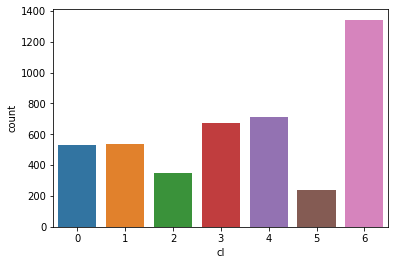

In [3]:
sns.countplot(df.cl)

### Preprocessing: Break sequence into chunksize of 6

In [5]:
data=df.sequence[0]

In [6]:
data

'ATGCCCCAACTAAATACTACCGTATGGCCCACCATAATTACCCCCATACTCCTTACACTATTCCTCATCACCCAACTAAAAATATTAAACACAAACTACCACCTACCTCCCTCACCAAAGCCCATAAAAATAAAAAATTATAACAAACCCTGAGAACCAAAATGAACGAAAATCTGTTCGCTTCATTCATTGCCCCCACAATCCTAG'

In [7]:
[data[i:i+6] for i in range(len(data))]

['ATGCCC',
 'TGCCCC',
 'GCCCCA',
 'CCCCAA',
 'CCCAAC',
 'CCAACT',
 'CAACTA',
 'AACTAA',
 'ACTAAA',
 'CTAAAT',
 'TAAATA',
 'AAATAC',
 'AATACT',
 'ATACTA',
 'TACTAC',
 'ACTACC',
 'CTACCG',
 'TACCGT',
 'ACCGTA',
 'CCGTAT',
 'CGTATG',
 'GTATGG',
 'TATGGC',
 'ATGGCC',
 'TGGCCC',
 'GGCCCA',
 'GCCCAC',
 'CCCACC',
 'CCACCA',
 'CACCAT',
 'ACCATA',
 'CCATAA',
 'CATAAT',
 'ATAATT',
 'TAATTA',
 'AATTAC',
 'ATTACC',
 'TTACCC',
 'TACCCC',
 'ACCCCC',
 'CCCCCA',
 'CCCCAT',
 'CCCATA',
 'CCATAC',
 'CATACT',
 'ATACTC',
 'TACTCC',
 'ACTCCT',
 'CTCCTT',
 'TCCTTA',
 'CCTTAC',
 'CTTACA',
 'TTACAC',
 'TACACT',
 'ACACTA',
 'CACTAT',
 'ACTATT',
 'CTATTC',
 'TATTCC',
 'ATTCCT',
 'TTCCTC',
 'TCCTCA',
 'CCTCAT',
 'CTCATC',
 'TCATCA',
 'CATCAC',
 'ATCACC',
 'TCACCC',
 'CACCCA',
 'ACCCAA',
 'CCCAAC',
 'CCAACT',
 'CAACTA',
 'AACTAA',
 'ACTAAA',
 'CTAAAA',
 'TAAAAA',
 'AAAAAT',
 'AAAATA',
 'AAATAT',
 'AATATT',
 'ATATTA',
 'TATTAA',
 'ATTAAA',
 'TTAAAC',
 'TAAACA',
 'AAACAC',
 'AACACA',
 'ACACAA',
 'CACAAA',
 'ACAAAC',

### Creating Function 

In [14]:
def Preprocess(seq):
    seq=seq.lower()
    data=[seq[i:i+6] for i in range(len(seq))]
    data1=" ".join(data)
    return data1
    
    

### Apply function to whole sequence using lambda fucntion

In [15]:
lam=lambda x:Preprocess(x)


In [17]:
df.sequence=df.sequence.apply(lam)

In [31]:
df.sequence

0       atgccc tgcccc gcccca ccccaa cccaac ccaact caac...
1       atgaac tgaacg gaacga aacgaa acgaaa cgaaaa gaaa...
2       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
3       atgtgt tgtgtg gtgtgg tgtggc gtggca tggcat ggca...
4       atgcaa tgcaac gcaaca caacag aacagc acagca cagc...
                              ...                        
4375    atggaa tggaag ggaaga gaagat aagatt agattt gatt...
4376    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4377    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
4378    atgggg tggggc ggggca gggcac ggcacc gcacct cacc...
4379    atgcag tgcagt gcagtc cagtcc agtcct gtcctt tcct...
Name: sequence, Length: 4380, dtype: object

### Create BOW (bag of words) using Count Vectorizer with ngrams of 4,4 and Create train and test data

In [43]:
X=df.sequence
Y=df.cl
#X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=.2,random_state=10)
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.2,random_state=10)
cv=CountVectorizer(ngram_range=(4,4))
X_train_dtm=cv.fit_transform(X_train)
X_test_dtm=cv.transform(X_test)


In [35]:
X_train.size

876

In [44]:
X_train_dtm

<3504x234624 sparse matrix of type '<class 'numpy.int64'>'
	with 4355746 stored elements in Compressed Sparse Row format>

### Create MultinomialNB() instance for training and testing

In [45]:
nb=MultinomialNB()

In [46]:
nb.fit(X_train_dtm,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [47]:
cv.get_feature_names()

['aaaaa aaaa aaa aa',
 'aaaaaa aaaaa aaaa aaa',
 'aaaaaa aaaaaa aaaaaa aaaaaa',
 'aaaaaa aaaaaa aaaaaa aaaaac',
 'aaaaaa aaaaaa aaaaaa aaaaag',
 'aaaaaa aaaaaa aaaaaa aaaaat',
 'aaaaaa aaaaaa aaaaac aaaaca',
 'aaaaaa aaaaaa aaaaac aaaacc',
 'aaaaaa aaaaaa aaaaac aaaacg',
 'aaaaaa aaaaaa aaaaac aaaact',
 'aaaaaa aaaaaa aaaaag aaaaga',
 'aaaaaa aaaaaa aaaaag aaaagc',
 'aaaaaa aaaaaa aaaaag aaaagg',
 'aaaaaa aaaaaa aaaaag aaaagt',
 'aaaaaa aaaaaa aaaaat aaaata',
 'aaaaaa aaaaaa aaaaat aaaatc',
 'aaaaaa aaaaaa aaaaat aaaatg',
 'aaaaaa aaaaaa aaaaat aaaatt',
 'aaaaaa aaaaac aaaaca aaacaa',
 'aaaaaa aaaaac aaaaca aaacac',
 'aaaaaa aaaaac aaaaca aaacag',
 'aaaaaa aaaaac aaaaca aaacat',
 'aaaaaa aaaaac aaaacc aaacca',
 'aaaaaa aaaaac aaaacc aaaccc',
 'aaaaaa aaaaac aaaacc aaaccg',
 'aaaaaa aaaaac aaaacc aaacct',
 'aaaaaa aaaaac aaaacg aaacga',
 'aaaaaa aaaaac aaaacg aaacgc',
 'aaaaaa aaaaac aaaacg aaacgg',
 'aaaaaa aaaaac aaaact aaacta',
 'aaaaaa aaaaac aaaact aaactc',
 'aaaaaa aaaaac aaaact a

In [48]:
len(cv.get_feature_names())

234624

### Fit and transform the data

In [49]:
nb.fit(X_train_dtm,Y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

### get feature names after transforming

In [50]:
cv.get_feature_names()

['aaaaa aaaa aaa aa',
 'aaaaaa aaaaa aaaa aaa',
 'aaaaaa aaaaaa aaaaaa aaaaaa',
 'aaaaaa aaaaaa aaaaaa aaaaac',
 'aaaaaa aaaaaa aaaaaa aaaaag',
 'aaaaaa aaaaaa aaaaaa aaaaat',
 'aaaaaa aaaaaa aaaaac aaaaca',
 'aaaaaa aaaaaa aaaaac aaaacc',
 'aaaaaa aaaaaa aaaaac aaaacg',
 'aaaaaa aaaaaa aaaaac aaaact',
 'aaaaaa aaaaaa aaaaag aaaaga',
 'aaaaaa aaaaaa aaaaag aaaagc',
 'aaaaaa aaaaaa aaaaag aaaagg',
 'aaaaaa aaaaaa aaaaag aaaagt',
 'aaaaaa aaaaaa aaaaat aaaata',
 'aaaaaa aaaaaa aaaaat aaaatc',
 'aaaaaa aaaaaa aaaaat aaaatg',
 'aaaaaa aaaaaa aaaaat aaaatt',
 'aaaaaa aaaaac aaaaca aaacaa',
 'aaaaaa aaaaac aaaaca aaacac',
 'aaaaaa aaaaac aaaaca aaacag',
 'aaaaaa aaaaac aaaaca aaacat',
 'aaaaaa aaaaac aaaacc aaacca',
 'aaaaaa aaaaac aaaacc aaaccc',
 'aaaaaa aaaaac aaaacc aaaccg',
 'aaaaaa aaaaac aaaacc aaacct',
 'aaaaaa aaaaac aaaacg aaacga',
 'aaaaaa aaaaac aaaacg aaacgc',
 'aaaaaa aaaaac aaaacg aaacgg',
 'aaaaaa aaaaac aaaact aaacta',
 'aaaaaa aaaaac aaaact aaactc',
 'aaaaaa aaaaac aaaact a

### Train and prediction

In [52]:
Y_pred=nb.predict(X_test_dtm)
Y_pred

array([5, 1, 4, 3, 2, 2, 3, 4, 0, 1, 3, 0, 6, 6, 4, 3, 1, 1, 4, 2, 6, 3,
       0, 2, 3, 5, 0, 4, 6, 0, 1, 6, 1, 5, 6, 3, 4, 4, 4, 1, 2, 6, 5, 6,
       6, 4, 4, 3, 4, 0, 6, 1, 1, 6, 1, 4, 6, 4, 0, 1, 6, 4, 3, 0, 6, 0,
       1, 6, 4, 6, 2, 3, 4, 6, 4, 2, 1, 1, 6, 6, 0, 4, 6, 6, 3, 5, 6, 2,
       6, 4, 1, 3, 6, 1, 1, 6, 6, 0, 4, 6, 4, 3, 0, 2, 6, 0, 4, 2, 6, 0,
       1, 6, 6, 1, 0, 6, 6, 0, 6, 6, 2, 3, 6, 2, 4, 4, 2, 5, 4, 5, 6, 1,
       1, 6, 3, 4, 0, 3, 4, 3, 6, 0, 0, 0, 6, 6, 6, 6, 1, 2, 3, 1, 3, 5,
       0, 4, 2, 6, 6, 1, 6, 4, 3, 1, 3, 6, 2, 5, 2, 4, 0, 6, 6, 4, 6, 3,
       1, 0, 6, 6, 6, 1, 6, 3, 4, 4, 1, 6, 1, 2, 1, 0, 0, 3, 4, 0, 6, 6,
       6, 3, 6, 5, 6, 6, 3, 4, 6, 3, 4, 4, 6, 4, 0, 1, 1, 1, 2, 5, 6, 3,
       4, 1, 6, 6, 4, 2, 0, 6, 4, 0, 4, 0, 1, 6, 4, 3, 3, 4, 3, 5, 1, 2,
       4, 6, 3, 0, 0, 4, 6, 6, 4, 2, 4, 1, 1, 3, 3, 6, 1, 6, 3, 0, 1, 2,
       1, 2, 1, 6, 5, 3, 4, 6, 1, 2, 4, 6, 6, 1, 4, 0, 4, 6, 1, 4, 6, 3,
       6, 2, 3, 6, 0, 4, 1, 6, 1, 4, 2, 4, 5, 2, 5,

### Accuracy score

In [55]:
accuracy_score(Y_test,Y_pred)*100

97.8310502283105

### Display confusion matrix

In [56]:
confusion_matrix(Y_test,Y_pred)

array([[ 94,   0,   0,   0,   4,   0,   1],
       [  1, 121,   0,   1,   0,   0,   0],
       [  0,   0,  71,   0,   0,   0,   1],
       [  0,   0,   0, 124,   3,   0,   0],
       [  2,   1,   0,   0, 152,   1,   0],
       [  0,   0,   0,   0,   1,  40,   0],
       [  0,   0,   0,   0,   3,   0, 255]], dtype=int64)

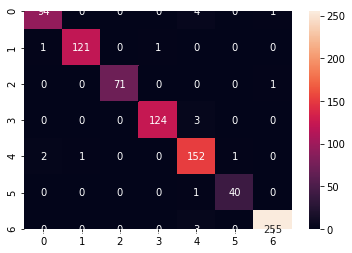

In [58]:
sns.heatmap(confusion_matrix(Y_test,Y_pred), annot=True,fmt="d")

### Display classification report

In [60]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.97      0.95      0.96        99
           1       0.99      0.98      0.99       123
           2       1.00      0.99      0.99        72
           3       0.99      0.98      0.98       127
           4       0.93      0.97      0.95       156
           5       0.98      0.98      0.98        41
           6       0.99      0.99      0.99       258

    accuracy                           0.98       876
   macro avg       0.98      0.98      0.98       876
weighted avg       0.98      0.98      0.98       876

